# 0 Setup

## 0.0 Runtime environemnt packages


In [1]:
%pip install numpy
%pip install scanpy
%pip install igraph
%pip install louvain
%pip install leidenalg
%pip install anndata
%pip install gdown -q

import scanpy as sc
import numpy as np
import os
import anndata
from sklearn import metrics
import pandas as pd
import warnings
import seaborn as sns




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for louvain: filename=louvain-0.8.2-cp312-cp312-linux_x86_64.whl size=971848 sha256=1d441cb6e46fde38a83e626943cc6475156ef19d024a076332a2b6aa1bd34d00
  Stored in directory: /root/.cache/pip/wheels/40/de/2b/bb7ed19d84727f9f299f20cd34c42bba9c8bef7d83d2255c86
Successfully built louvain
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 0.1 Fetch data using gdown


In [2]:
!gdown --id 1gkr16CbHYIXDVw9ggN8rBvGZq_llDvxD -O cleaned_processed_frogtail.h5ad
local_filename = 'cleaned_processed_frogtail.h5ad'

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1gkr16CbHYIXDVw9ggN8rBvGZq_llDvxD
From (redirected): https://drive.google.com/uc?id=1gkr16CbHYIXDVw9ggN8rBvGZq_llDvxD&confirm=t&uuid=92d515e0-b1d2-4bc9-b8a6-83e288264eb6
To: /content/cleaned_processed_frogtail.h5ad
100% 355M/355M [00:03<00:00, 115MB/s]


## 0.2 Read data from .h5ad file


In [3]:
file_path = os.path.abspath(local_filename) # this fails if local_filename has not been declared in previous cell

# 1. Check if the file exists at the local path
if os.path.exists(file_path):
    try:
        # 2. Read the H5AD file directly
        adata = anndata.read_h5ad(file_path)

        print("\n✅ Success! AnnData object loaded.")
        print("\n--- AnnData Object Summary ---")
        print(adata)

        # Display key metadata
        print("\nFirst 5 rows of Cell Metadata (adata.obs):")
        print(adata.obs.head())

        print("\nFirst 5 rows of Gene Metadata (adata.var):")
        print(adata.var.head())

    except Exception as e:
        print(f"\n❌ Error during anndata read: {e}")
        print("This typically means the file is corrupted or not a valid H5AD format.")
        print("Please check the integrity of your manually downloaded file.")

else:
    print("\n❌ File not found.")
    print(f"Please ensure the file '{file_path}' exists in the current working directory.")


✅ Success! AnnData object loaded.

--- AnnData Object Summary ---
AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

First 5 rows of Cell Metadata (adata.obs):
        barcode_cells                cell  sample DevelopmentalStage  \
0  AAACCTGAGCTAGTTC.1  AAACCTGAGCTAGTTC.1  SIGAB5               st40   
1  AAACCTGGTGGGTCAA.1  AAACCTGGTGGGTCAA.1  SIGAB5               st40   
2  AAACCTGGTTTGTTGG.1  AAACCTGGTTTGTTGG.1  SIGAB5               st40   
3  AAACGGGGTCGGCATC.1  AAACGGGGTCGGCATC.1  SIGAB5               st40   
4  AAACGGGTCCTACAGA.1  AAACGGGTCCTACAGA.1  SIGAB5               st40   

   DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                   3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                   3      Myeloid 1 -2.428271  13.826715             G1   
2          

/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


# 1 Clustering Analysis:

- Use at least two clustering algorithms (e.g., PCA + Louvain, PCA + Leiden, kNN).
- Generate figures to visualize the clusters.
- Compute clustering metrics (e.g., RAND-index, silhouette score, ARI).
- Optionally, explore a metric not discussed in class for bonus points.

**Preprocessing and clustering**
_- Scanpy documentation - tutorials_
*https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html*


## 1.0 Quality control

https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#quality-control


In [4]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)


### Doublet detection

https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#doublet-detection


In [5]:
sc.pp.scrublet(adata, batch_key="sample")
adata = adata[~adata.obs['predicted_doublet'], :].copy()


## 1.1 Normalization

https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#normalization


In [6]:
adata.layers["counts"] = adata.X.copy()     # Saving count data - scapy docs
adata_copy = adata.copy()    # create a copy of data to alter
sc.pp.normalize_total(adata_copy) # Normalizing to median total counts - scanpy docs
sc.pp.log1p(adata_copy) # Logarithmize the data - scanpy docs

## 1.2 Feature selection

https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#feature-selection


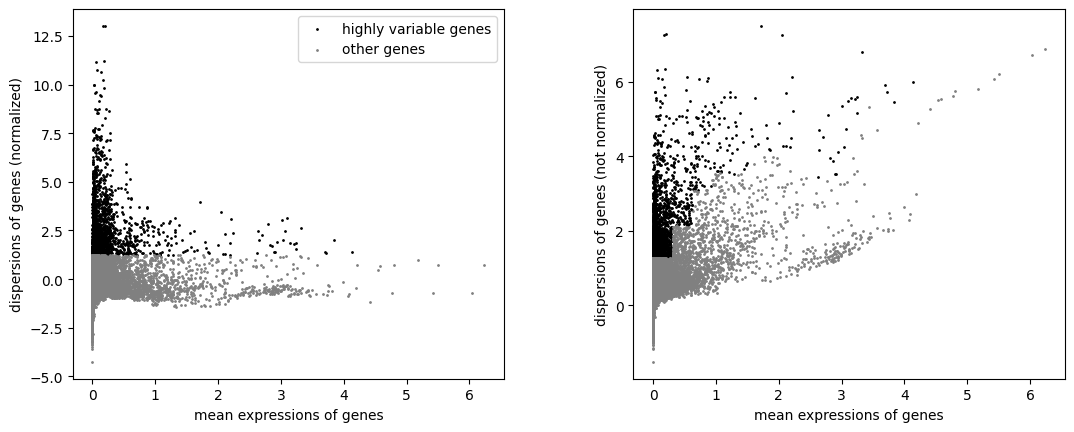

In [7]:
sc.pp.highly_variable_genes(adata_copy, n_top_genes=2000)
sc.pl.highly_variable_genes(adata_copy)

## 1.3 Dimensionality Reduction

https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#dimensionality-reduction


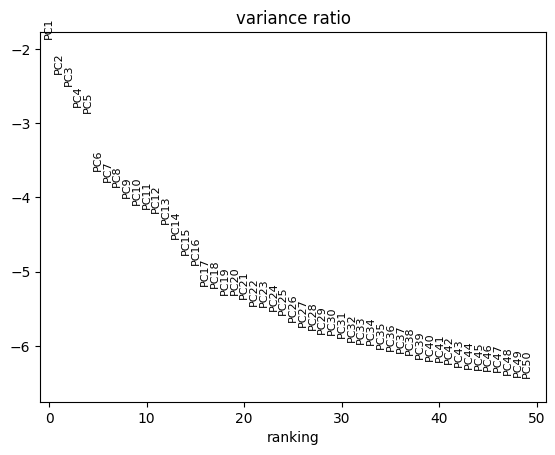

In [8]:
sc.pp.pca(adata_copy, n_comps=50)
sc.pl.pca_variance_ratio(adata_copy, n_pcs=50, log=True)

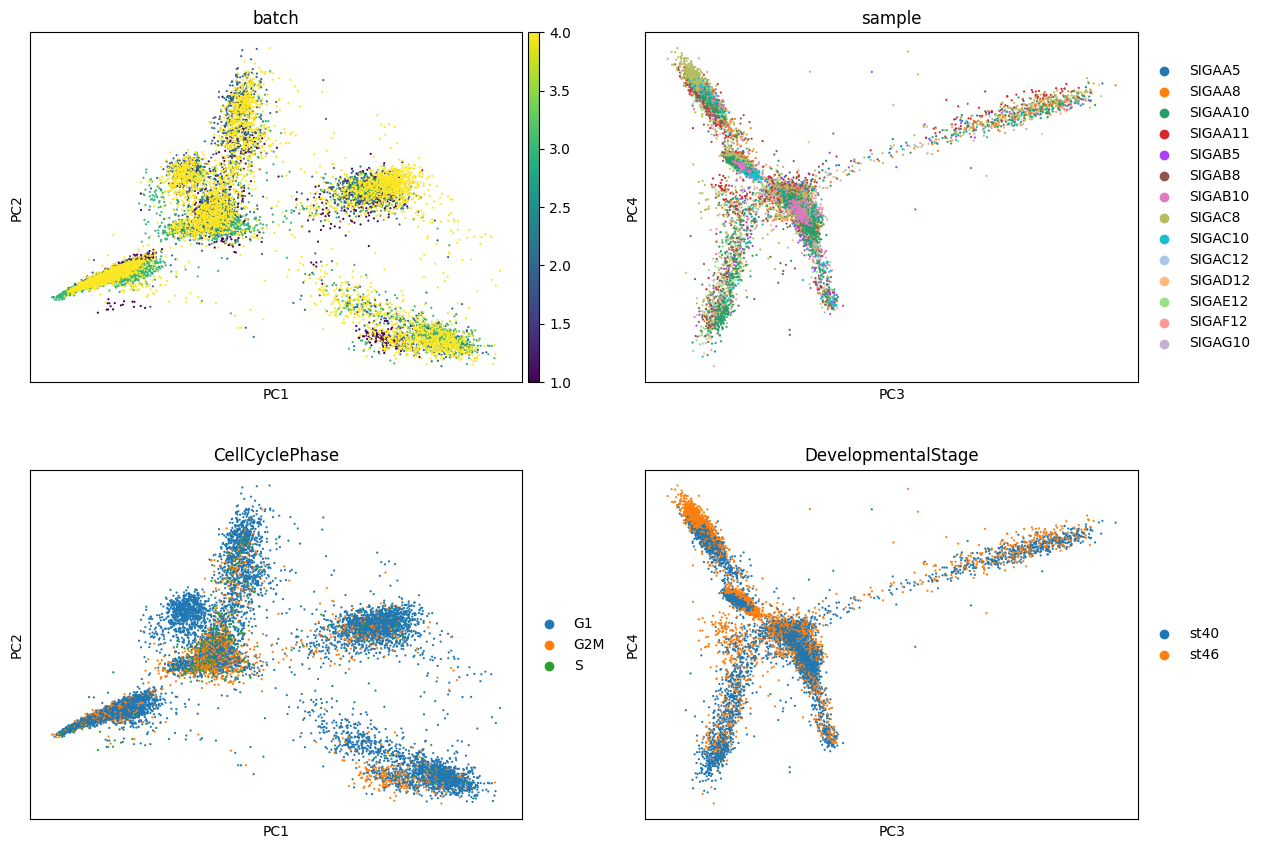

In [9]:
        # Plot 3b: PCA Scatter Plots (Checking for batch and cell cycle effects)
        # Plots the top PCs (PC1 vs PC2 and PC3 vs PC4) colored by metadata.
        # Note: We use 'batch', 'sample', and 'CellCyclePhase' from the obs table.
        # This checks if variation is driven by technical noise rather than biology.
sc.pl.pca(
    adata_copy,
    color=["batch", "sample", "CellCyclePhase", "DevelopmentalStage"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)], # Plotting PC1/PC2 and PC3/PC4
    ncols=2,
    size=10,
    # title="PCA Scatter Plots: Checking for Batch/Cell Cycle Effects",
    show=True)

## 1.4 Nearest neighbor graph


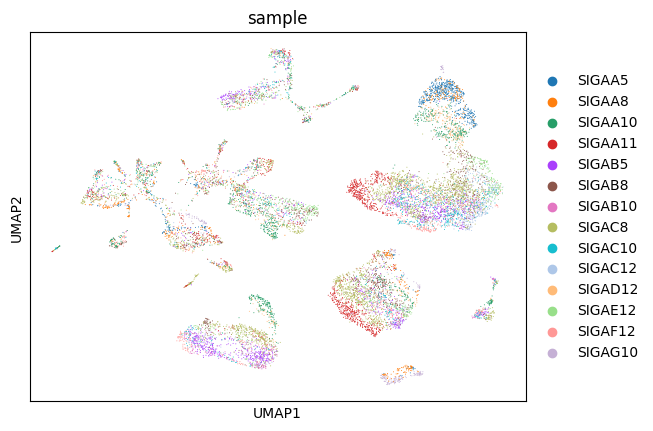

In [10]:
sc.pp.neighbors(adata_copy) # k-NN graph
sc.tl.umap(adata_copy)
sc.pl.umap(
    adata_copy,
    color="sample",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

## 1.5 Clustering


In [11]:
def set_colorblind_palette(adata, obs_name, palette_name="tab20"):
    """
    Apply a Seaborn color palette (default: husl) to a categorical obs column in an AnnData object.
    Ensures enough distinct colors even if there are many categories.
    """
    # Ensure column exists
    if obs_name not in adata.obs:
        raise ValueError(f"'{obs_name}' not found in adata.obs")

    # Make sure the column is categorical
    adata.obs[obs_name] = pd.Categorical(adata.obs[obs_name])
    n = adata.obs[obs_name].nunique()

    # Generate enough colors (repeat the palette if too short)
    base_colors = sns.color_palette(palette_name, n_colors=min(n, 10)).as_hex()
    # if n > len(base_colors):
    #     # extend by cycling through the base palette
    #     colors = (base_colors * ((n // len(base_colors)) + 1))[:n]
    # else:
    #     colors = base_colors

    # Store in AnnData
    adata.uns[f"{obs_name}_colors"] = base_colors

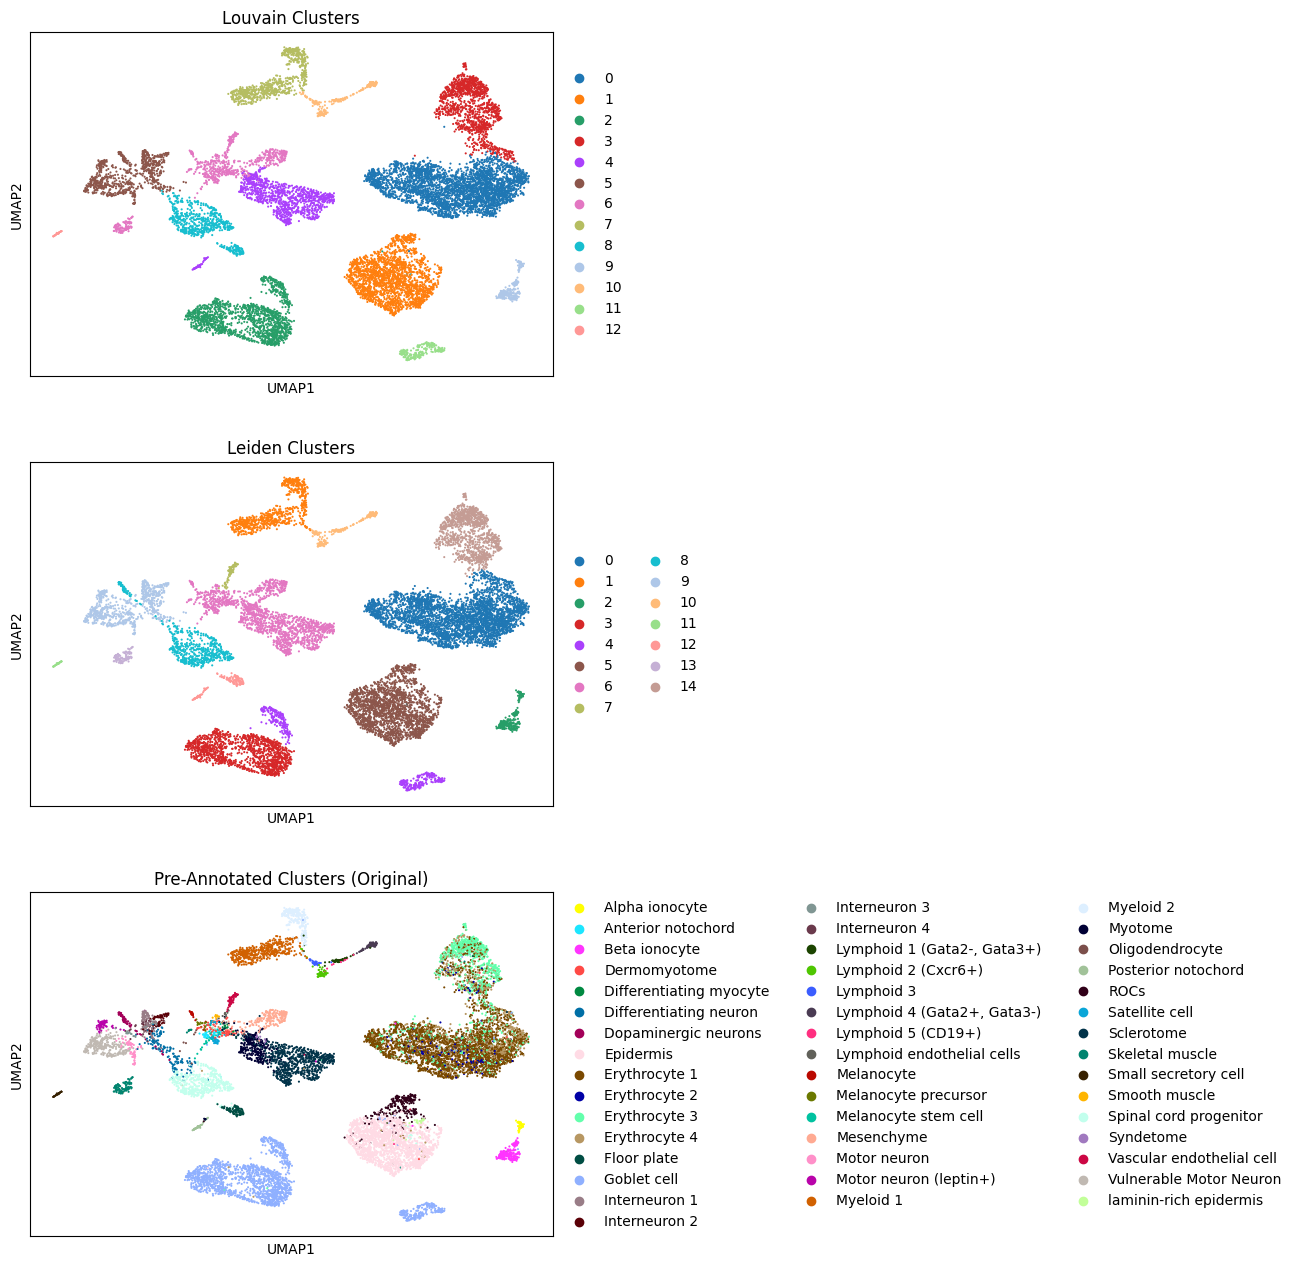

In [12]:
sc.tl.louvain(adata_copy, key_added='louvain_clusters', resolution=0.25) # clustering 1 louvain
sc.tl.leiden(adata_copy, key_added='leiden_clusters', flavor="igraph", n_iterations=2, resolution=0.2) # clustering 2 leiden
sc.tl.umap(adata_copy) # UMAP embedding

to_do = ['louvain_clusters', 'leiden_clusters', 'cluster']

for stak in to_do:
  set_colorblind_palette(adata_copy, obs_name=stak)

sc.pl.umap(adata_copy,
                color=to_do,
                title=['Louvain Clusters', 'Leiden Clusters', 'Pre-Annotated Clusters (Original)'],
                show=True,
            ncols=1
            # Explicitly provide palette names instead of None for the first two plots
            # palette=['default', 'plasma', cluster_colors]
           )

## 1.6 Clustering performance evaluation

- Compute clustering metrics (e.g., RAND-index, silhouette score, ARI).
- Optionally, explore a metric not discussed in class for bonus points.


### 1.6.a RAND-index & ARI

https://scikit-learn.org/stable/modules/clustering.html#rand-index

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score


In [13]:
# RAND checks known truth against our predicted labels.
labels_known = adata.obs['cluster'].astype(str)
labels_leiden = adata_copy.obs['leiden_clusters'].astype(str)
labels_louvain = adata_copy.obs['louvain_clusters'].astype(str)
print(f'Leiden randscore: {metrics.rand_score(labels_known,labels_leiden):.3f}')
print(f'Louvain randscore; {metrics.rand_score(labels_known,labels_louvain):.3f}')
print('Perfect labeling is scored 1.0:')
print(f'Leiden adjusted randscore: {metrics.adjusted_rand_score(labels_known,labels_leiden):.3f}')
print(f'Louvain adjusted randscore; {metrics.adjusted_rand_score(labels_known,labels_louvain):.3f}')


Leiden randscore: 0.917
Louvain randscore; 0.923
Perfect labeling is scored 1.0:
Leiden adjusted randscore: 0.614
Louvain adjusted randscore; 0.634


In [14]:
print(np.isin(np.array(['ROCs']),labels_known))

[ True]


### 1.6.b Silhouette score

https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient


In [15]:
# For unknow truth labels we check against the model itself
# a: The mean distance between a sample and all other points in the same class.
# b: The mean distance between a sample and all other points in the next nearest cluster.

# s = (b - a)/max(a,b)
print(metrics.silhouette_score(adata_copy.obsm['X_pca'], adata_copy.obs['leiden_clusters'].astype(str), metric='euclidean'))
print(metrics.silhouette_score(adata_copy.obsm['X_pca'], adata_copy.obs['louvain_clusters'].astype(str), metric='euclidean'))

0.36797002
0.3645307


### 1.6.c Mutual Information

Since in our case we know the ground truth it makes sense to try another ground truth based metric from the scikit library

---

https://scikit-learn.org/stable/modules/clustering.html#mutual-information-based-scores


In [16]:
for key, value in {'leiden' : labels_leiden,'louvain': labels_louvain}.items():
  print(f'--- {key}')
  print(f'{key} Mutual information: {metrics.mutual_info_score(labels_known, value):.3f}')
  print(f'{key} Normalized mutual informtion (NMI): {metrics.normalized_mutual_info_score(labels_known, value):.3f}')
  print(f'{key} Adjusted mutual information (AMI): {metrics.adjusted_mutual_info_score(labels_known, value):.3f}')

--- leiden
leiden Mutual information: 1.895
leiden Normalized mutual informtion (NMI): 0.756
leiden Adjusted mutual information (AMI): 0.753
--- louvain
louvain Mutual information: 1.883
louvain Normalized mutual informtion (NMI): 0.752
louvain Adjusted mutual information (AMI): 0.750


# 2 Marker Selection and Gene Analysis:

- Use at least two marker selection methods to identify genes that define the ROC.
- Compare the identified markers across different methods.
- Compare your gene set with the genes listed in Supplementary Table 3.
- Optionally, perform Gene Ontology (GO) analysis to explore the biological roles of these genes in other context


## 2.0 Investigate known location of markers


cluster categories (in order): ['Alpha ionocyte', 'Anterior notochord', 'Beta ionocyte', 'Dermomyotome', 'Differentiating myocyte', 'Differentiating neuron', 'Dopaminergic neurons', 'Epidermis', 'Erythrocyte 1', 'Erythrocyte 2', 'Erythrocyte 3', 'Erythrocyte 4', 'Floor plate', 'Goblet cell', 'Interneuron 1', 'Interneuron 2', 'Interneuron 3', 'Interneuron 4', 'Lymphoid 1 (Gata2-, Gata3+)', 'Lymphoid 2 (Cxcr6+)', 'Lymphoid 3', 'Lymphoid 4 (Gata2+, Gata3-)', 'Lymphoid 5 (CD19+)', 'Lymphoid endothelial cells', 'Melanocyte', 'Melanocyte precursor', 'Melanocyte stem cell', 'Mesenchyme', 'Motor neuron', 'Motor neuron (leptin+)', 'Myeloid 1', 'Myeloid 2', 'Myotome', 'Oligodendrocyte', 'Posterior notochord', 'ROCs', 'Satellite cell', 'Sclerotome', 'Skeletal muscle', 'Small secretory cell', 'Smooth muscle', 'Spinal cord progenitor', 'Syndetome', 'Vascular endothelial cell', 'Vulnerable Motor Neuron', 'laminin-rich epidermis']


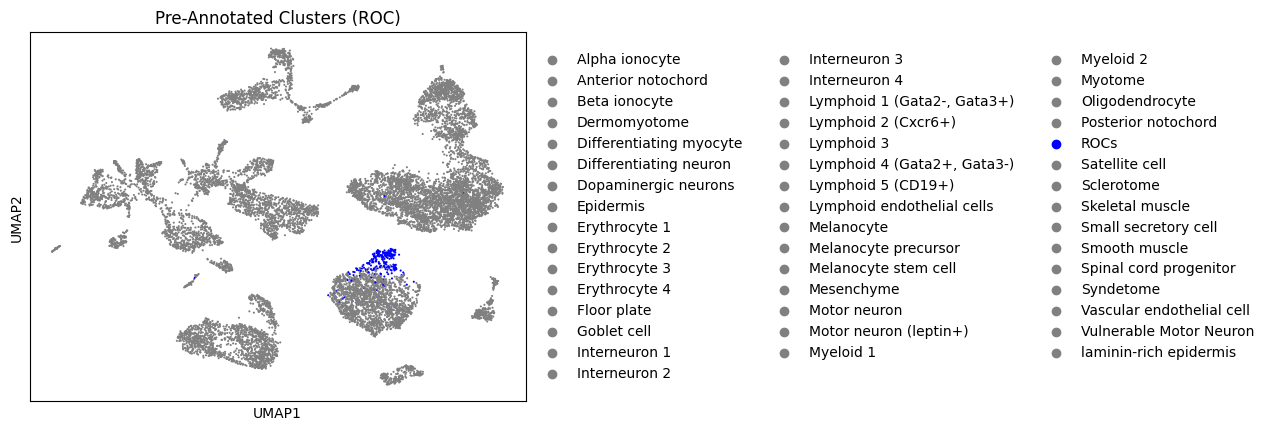

In [17]:
adata_copy.obs['cluster'] = pd.Categorical(adata_copy.obs['cluster'])
categories = list(adata_copy.obs['cluster'].cat.categories)
print('cluster categories (in order):', categories)

# --- build a list of colors in the exact same order as `categories` ---
colors = ['blue' if c == 'ROCs' else 'grey' for c in categories]

# sanity check (must match)
assert len(colors) == len(categories), "number of colors must equal number of categories"

# --- store a list (not a dict) at the key "<obs_name>_colors" or "<obs_name>_colors" ---
# Scanpy looks for adata.uns['cluster_colors'] when plotting the 'cluster' obs.
adata_copy.uns['cluster_colors'] = colors

sc.pl.umap(adata_copy,
                color=['cluster'],
                title=['Pre-Annotated Clusters (ROC)'],
                show=True,
            ncols=1
          #  palette=3*['tab20']
            # Explicitly provide palette names instead of None for the first two plots
            # palette=['viridis', 'plasma', cluster_colors]
           )

_Top marker functions_


## 2.1 Find marker


In [18]:
def get_top_markers(adata, method_key, group_id=None, n_genes=5):
    """Extracts and formats the top N marker genes from rank_genes_groups results."""
    # Build the column key, e.g., 'rank_genes_groups_wilcoxon'

    if method_key not in adata.uns:
        print(f"Error: Marker gene results not found at adata.uns['{method_key}']")
        return []

    # Use scanpy utility to extract results into a DataFrame
    df = sc.get.rank_genes_groups_df(adata, key=method_key, group=group_id)

    # Return a concise list of the top N gene names
    return df['names'].head(n_genes).tolist()

-> Method 2: Running T-test...

-> Visualizing expression of top marker: hbd.S
  Top 5 Wilcoxon Markers: ['hbd.S', 'Xelaev18045099m.g', 'Xelaev18002241m.g', 'ca2.L', 'nmrk2.L']
  Top 5 T-test Markers: ['Xelaev18045099m.g', 'hbd.S', 'Xelaev18002241m.g', 'Xelaev18045098m.g', 'Xelaev18047464m.g']


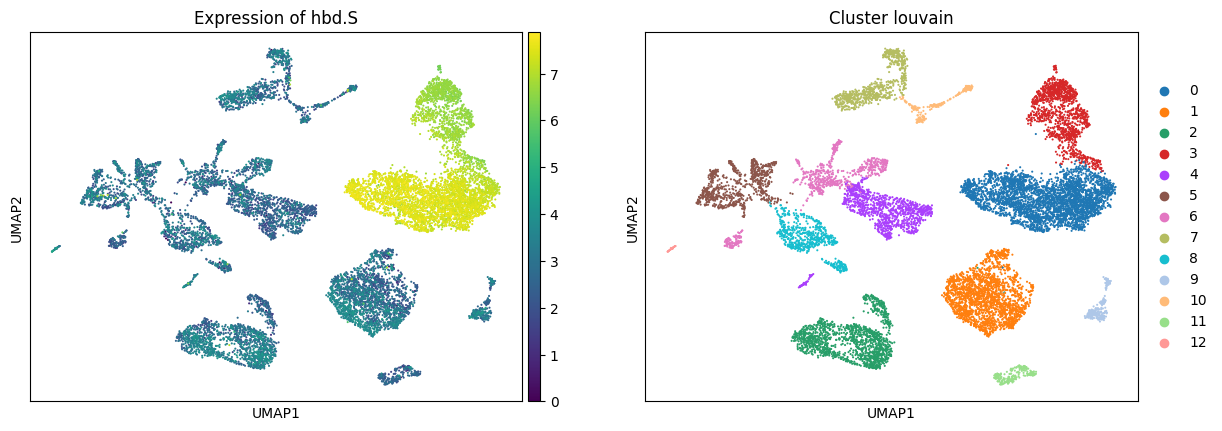

In [19]:

# Identify the largest cluster in the coarse resolution as the target ROC
target_cluster = None

# Method 1: Wilcoxon Rank-Sum Test (Non-parametric)
sc.tl.rank_genes_groups(
    adata_copy,
    groupby='louvain_clusters',
    method='wilcoxon',
    key_added='wilcoxon'
)
wilcoxon_markers = get_top_markers(adata_copy, 'wilcoxon', target_cluster)


# Method 2: T-test (Parametric)
print("-> Method 2: Running T-test...")
sc.tl.rank_genes_groups(
    adata_copy,
    groupby='louvain_clusters',
    method='t-test',
    key_added='t-test'
)
ttest_markers = get_top_markers(adata_copy, 't-test', target_cluster)

# Visualize the expression of the top Wilcoxon marker gene
top_wilcoxon_gene = wilcoxon_markers[0]
print(f"\n-> Visualizing expression of top marker: {top_wilcoxon_gene}")
print(f"  Top 5 Wilcoxon Markers: {wilcoxon_markers}")
print(f"  Top 5 T-test Markers: {ttest_markers}")

sc.pl.umap(adata_copy,
            color=[top_wilcoxon_gene, 'louvain_clusters'],
            title=[f"Expression of {top_wilcoxon_gene}", f"Cluster louvain"],
            ncols=2,
            show=True)
# --- END MARKER SELECTION ---

## 2.2 Look in our cluster that contains the known


-> Method 2: Running T-test...

-> Visualizing expression of top marker: lum.L
  Top 5 Wilcoxon Markers: ['lum.L', 'col1a1.L', 's100a11.L', 'mdk.S', 'col1a1.S']
  Top 5 T-test Markers: ['mdk.S', 's100a11.L', 'col1a1.S', 'col1a1.L', 'epcam.L']


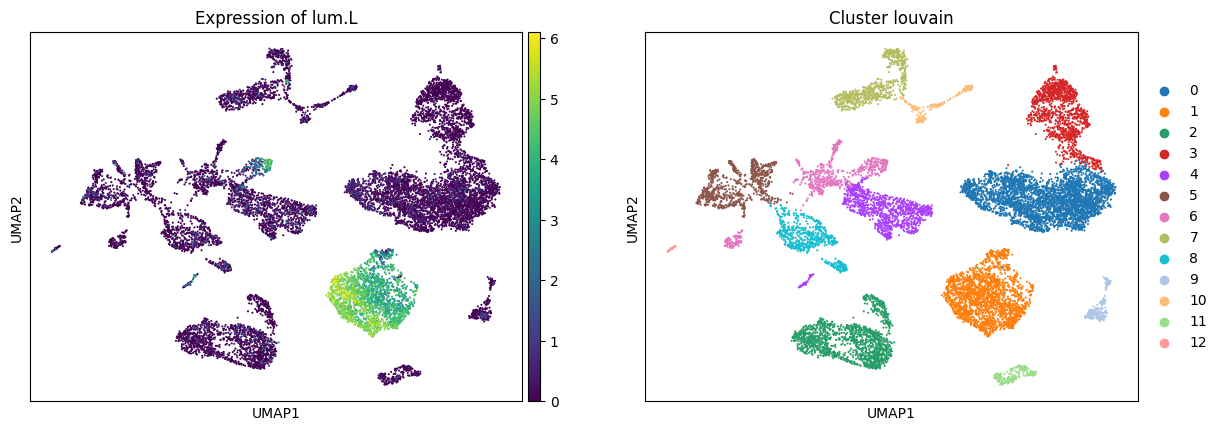

In [20]:
# Identify the largest cluster in the coarse resolution as the target ROC
target_cluster = adata_copy.obs['louvain_clusters'].value_counts().index[1]

# Method 1: Wilcoxon Rank-Sum Test (Non-parametric)
sc.tl.rank_genes_groups(
    adata_copy,
    groupby='louvain_clusters',
    method='wilcoxon',
    key_added='wilcoxon'
)
wilcoxon_markers = get_top_markers(adata_copy, 'wilcoxon', target_cluster)


# Method 2: T-test (Parametric)
print("-> Method 2: Running T-test...")
sc.tl.rank_genes_groups(
    adata_copy,
    groupby='louvain_clusters',
    method='t-test',
    key_added='t-test'
)
ttest_markers = get_top_markers(adata_copy, 't-test', target_cluster)

# Visualize the expression of the top Wilcoxon marker gene
top_wilcoxon_gene = wilcoxon_markers[0]
print(f"\n-> Visualizing expression of top marker: {top_wilcoxon_gene}")
print(f"  Top 5 Wilcoxon Markers: {wilcoxon_markers}")
print(f"  Top 5 T-test Markers: {ttest_markers}")

sc.pl.umap(adata_copy,
            color=[top_wilcoxon_gene, 'louvain_clusters'],
            title=[f"Expression of {top_wilcoxon_gene}", f"Cluster louvain"],
            ncols=2,
            show=True)


-> Visualizing expression of top marker: col1a1.L
  Top 5 Wilcoxon Markers: ['lum.L', 'col1a1.L', 's100a11.L', 'mdk.S', 'col1a1.S']
  Top 5 T-test Markers: ['mdk.S', 's100a11.L', 'col1a1.S', 'col1a1.L', 'epcam.L']


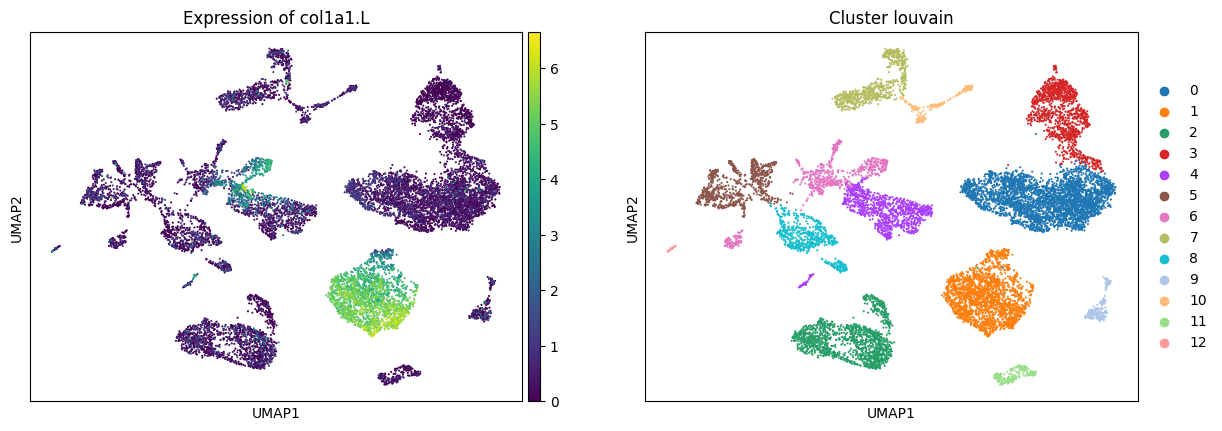

In [21]:
# Visualize the expression of the top Wilcoxon marker gene
top_wilcoxon_gene = wilcoxon_markers[1]
print(f"\n-> Visualizing expression of top marker: {top_wilcoxon_gene}")
print(f"  Top 5 Wilcoxon Markers: {wilcoxon_markers}")
print(f"  Top 5 T-test Markers: {ttest_markers}")

sc.pl.umap(adata_copy,
            color=[top_wilcoxon_gene, 'louvain_clusters'],
            title=[f"Expression of {top_wilcoxon_gene}", f"Cluster louvain"],
            ncols=2,
            show=True)
# --- END MARKER SELECTION ---

**Compare the identified markers across different methods.**


In [22]:
# wilcoxon_markers
# ttest_markers
shared_markers = list((set(wilcoxon_markers)).intersection((set(ttest_markers))))
print('shared markers\n')
for stak in shared_markers:
  print(f'marker:{stak}\nwilcoxon rank:{wilcoxon_markers.index(stak)+1}\nttest rank:{ttest_markers.index(stak)+1}\n')

shared markers

marker:mdk.S
wilcoxon rank:4
ttest rank:1

marker:s100a11.L
wilcoxon rank:3
ttest rank:2

marker:col1a1.L
wilcoxon rank:2
ttest rank:4

marker:col1a1.S
wilcoxon rank:5
ttest rank:3



## 2.3 Validate against table 3


https://docs.google.com/spreadsheets/d/11YqwlmXqgMFcWGum9Dbr5oDi1RWCdX8W/edit?usp=sharing&ouid=113999859350074512030&rtpof=true&sd=true


In [23]:

# 1. Define the Google Sheet ID
sheet_id = '11YqwlmXqgMFcWGum9Dbr5oDi1RWCdX8W'

# 2. Construct the direct export link
export_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx'

# 3. Read the file directly from the URL into a DataFrame
# Note: You may need to install the 'openpyxl' engine if you haven't already: !pip install openpyxl
df_gene_map = pd.read_excel(export_url, sheet_name=None)

ROC_markers = df_gene_map['ROC markers']
for key,value in df_gene_map.items():
  wilcoxon_check = np.isin(np.array(wilcoxon_markers),value.iloc[:,0])
  ttest_check = np.isin(ttest_markers[0:-1],value.iloc[:,0])
  if np.any(ttest_check):
    print(f'\nsheet:{key}\nttest:{ttest_markers[ttest_check]}\n')
  if np.any(wilcoxon_check):
    print(f'\nsheet:{key}\nwilcoxon:{wilcoxon_markers[wilcoxon_check]}\n')
  # print(np.isin(wilcoxon_markers,value))
  # print(np.isin())


filtered_wilcoxon = [str(x).split('.')[0] for x in wilcoxon_markers]
filtered_ttest = [str(x).split('.')[0] for x in ttest_markers]
# p
for index, row in ROC_markers.iterrows():
  value = row.values[0]
  if (value in filtered_wilcoxon) or (value in filtered_ttest):
    print(value)

Nothing in common.

**Printing out known values**


In [24]:
ROC_markers = df_gene_map['ROC markers']
print(ROC_markers.iloc[:,0])

0        loc100488523
1        loc100492954
2               egfl6
3               lpar3
4                cpa6
5                 sp9
6                fgf9
7                fbn2
8             tinagl1
9                fgf7
10               vwde
11               lef1
12              lamb2
13              fgfr4
14               fgf7
15              rspo2
16               cpa6
17       loc100498358
18                krt
19       loc100486832
20               jag1
21    Xelaev18043128m
22               dlx2
23               tp73
24               gdf6
25    Xelaev18046800m
26               nid2
27             igfbp2
28               ism2
29               dlx2
30       loc100493805
31              frem2
32    Xelaev18044182m
33               bmp5
34             tspear
35             sema3f
36              robo4
37             jchain
38              rspo2
39           adamts18
40               pltp
41    Xelaev18034799m
42              lamb1
43              lamb1
44              unc5b
45        

## 2.4 Try using st46 and st40 grouping instead


In [25]:
def remove_dot(_list):
  return set([x.split('.')[0] for x in _list])

In [26]:
# --- START DIFFERENTIAL EXPRESSION (DE) FOR ROC GENES ---
print("\n--- DIFFERENTIAL EXPRESSION: Finding Regeneration-Specific Genes ---")

# Goal: Find genes enriched in the later DevelopmentalStage ('st46')
# compared to the earlier stage ('st40')
target_group = 'st46'
reference_group = 'st40'
groupby_key = 'DevelopmentalStage'

print(f"-> Method 1 (Wilcoxon DE): {target_group} vs {reference_group}")
sc.tl.rank_genes_groups(
    adata_copy,
    groupby=groupby_key,
    groups=[target_group], # Genes enriched in this group
    reference=reference_group, # Compared to this group
    method='wilcoxon',
    key_added='de_wilcoxon_stages'
)

# Method 2 (T-test DE): Same comparison
print(f"-> Method 2 (T-test DE): {target_group} vs {reference_group}")
sc.tl.rank_genes_groups(
    adata_copy,
    groupby=groupby_key,
    groups=[target_group],
    reference=reference_group,
    method='t-test',
    key_added='de_ttest_stages'
)

# Displaying DE analysis results for the Target Group
de_wilcoxon_df = get_top_markers(adata_copy, 'de_wilcoxon_stages', target_group, n_genes=10)
de_ttest_df = get_top_markers(adata_copy, 'de_ttest_stages', target_group, n_genes=10)

print(f"\nTop 10 Differentially Expressed Genes in '{target_group}' (Wilcoxon):")
print(de_wilcoxon_df)

print(f"\nTop 10 Differentially Expressed Genes in '{target_group}' (T-test):")
print(de_ttest_df)

for index, row in ROC_markers.iterrows():
  val = row.values[0]
  if val in remove_dot(de_wilcoxon_df):
    print(val)
  if val in remove_dot(de_ttest_df):
    print(val)

# for key,value in df_gene_map.items():
#   wilcoxon_check = np.isin(de_wilcoxon_df,value.iloc[:,0])
#   print(de_wilcoxon_df)
#   print(wilcoxon_check)
#   ttest_check = np.isin(ttest_markers[0:-1],value.iloc[:,0])
#   if np.any(ttest_check):
#     print(f'\nsheet:{key}\nttest:{ttest_markers[ttest_check]}\n')
#   if np.any(wilcoxon_check):
#     print(f'\nsheet:{key}\nwilcoxon:{wilcoxon_markers[wilcoxon_check]}\n')
  # print(np.isin(wilcoxon_markers,value))
  # print(np.isin())



--- DIFFERENTIAL EXPRESSION: Finding Regeneration-Specific Genes ---
-> Method 1 (Wilcoxon DE): st46 vs st40
-> Method 2 (T-test DE): st46 vs st40

Top 10 Differentially Expressed Genes in 'st46' (Wilcoxon):
['ddx21.L', 'Xelaev18022166m.g', 'hbd.S', 'ddx21.S', 'Xelaev18045099m.g', 'Xetrov90018123m.L', 'col1a2.L', 'lum.L', 'col1a1.L', 'col1a1.S']

Top 10 Differentially Expressed Genes in 'st46' (T-test):
['ddx21.L', 'Xelaev18022166m.g', 'tnmd.L', 'lum.L', 'col1a2.L', 'c2orf40.L', 'lum.S', 'txnip.L', 'ddx21.S', 'kera.L']


In [27]:
# Same target cluster as in 2.2
target_cluster_2_2 = adata_copy.obs['louvain_clusters'].value_counts().index[1]

print(f"Targeting louvain cluster: {target_cluster_2_2}")

# Subset the AnnData object to only include cells from the target cluster
adata_target_2_5 = adata_copy[adata_copy.obs['louvain_clusters'] == target_cluster_2_2].copy()

# --- START TARGETED DIFFERENTIAL EXPRESSION (DE) ---
# Goal: Find genes enriched in 'st46' vs 'st40' within the target cluster.
target_group = 'st46'
reference_group = 'st40'
groupby_key = 'DevelopmentalStage'

print(f"-> Targeted Wilcoxon DE: {target_group} vs {reference_group} in Cluster {target_cluster_2_2}")
sc.tl.rank_genes_groups(
    adata_target_2_5,
    groupby=groupby_key,
    groups=[target_group],
    reference=reference_group,
    method='wilcoxon',
    key_added='de_targeted_wilcoxon_2_5'
)

print(f"-> Targeted T-test DE: {target_group} vs {reference_group} in Cluster {target_cluster_2_2}")
sc.tl.rank_genes_groups(
    adata_target_2_5,
    groupby=groupby_key,
    groups=[target_group],
    reference=reference_group,
    method='t-test',
    key_added='de_targeted_ttest_2_5'
)

# --- Extract and Display Results ---
de_wilcoxon_df_2_5 = get_top_markers(adata_target_2_5, 'de_targeted_wilcoxon_2_5', target_group, n_genes=10)
de_ttest_df_2_5 = get_top_markers(adata_target_2_5, 'de_targeted_ttest_2_5', target_group, n_genes=10)

print(f"\nTop 10 TARGETED DE Genes in '{target_group}' (Wilcoxon, Cluster {target_cluster_2_2}):")
print(de_wilcoxon_df_2_5)

print(f"\nTop 10 TARGETED DE Genes in '{target_group}' (T-test, Cluster {target_cluster_2_2}):")
print(de_ttest_df_2_5)

# --- Check against known ROC markers ---
print("\n--- Checking for known ROC markers ---")
for index, row in ROC_markers.iterrows():
  val = row.values[0]
  if val in remove_dot(de_wilcoxon_df_2_5):
    print(f"Found in Wilcoxon results: {val}")
  if val in remove_dot(de_ttest_df_2_5):
    print(f"Found in T-test results: {val}")

Targeting louvain cluster: 1
-> Targeted Wilcoxon DE: st46 vs st40 in Cluster 1
-> Targeted T-test DE: st46 vs st40 in Cluster 1

Top 10 TARGETED DE Genes in 'st46' (Wilcoxon, Cluster 1):
['lum.L', 'Xetrov90018123m.L', 'cfl1.L', 'ly6g6c.L', 'c2orf40.L', 'lum.S', 'hpgds.S', 'hbd.S', 'perp.S', 'apoe.L']

Top 10 TARGETED DE Genes in 'st46' (T-test, Cluster 1):
['Xetrov90018123m.L', 'lum.L', 'ly6g6c.L', 'cfl1.L', 'hbd.S', 'hpgds.S', 'tnmd.L', 'emp1.L', 'c2orf40.L', 'epyc.S']

--- Checking for known ROC markers ---


Targeting louvain cluster: 1


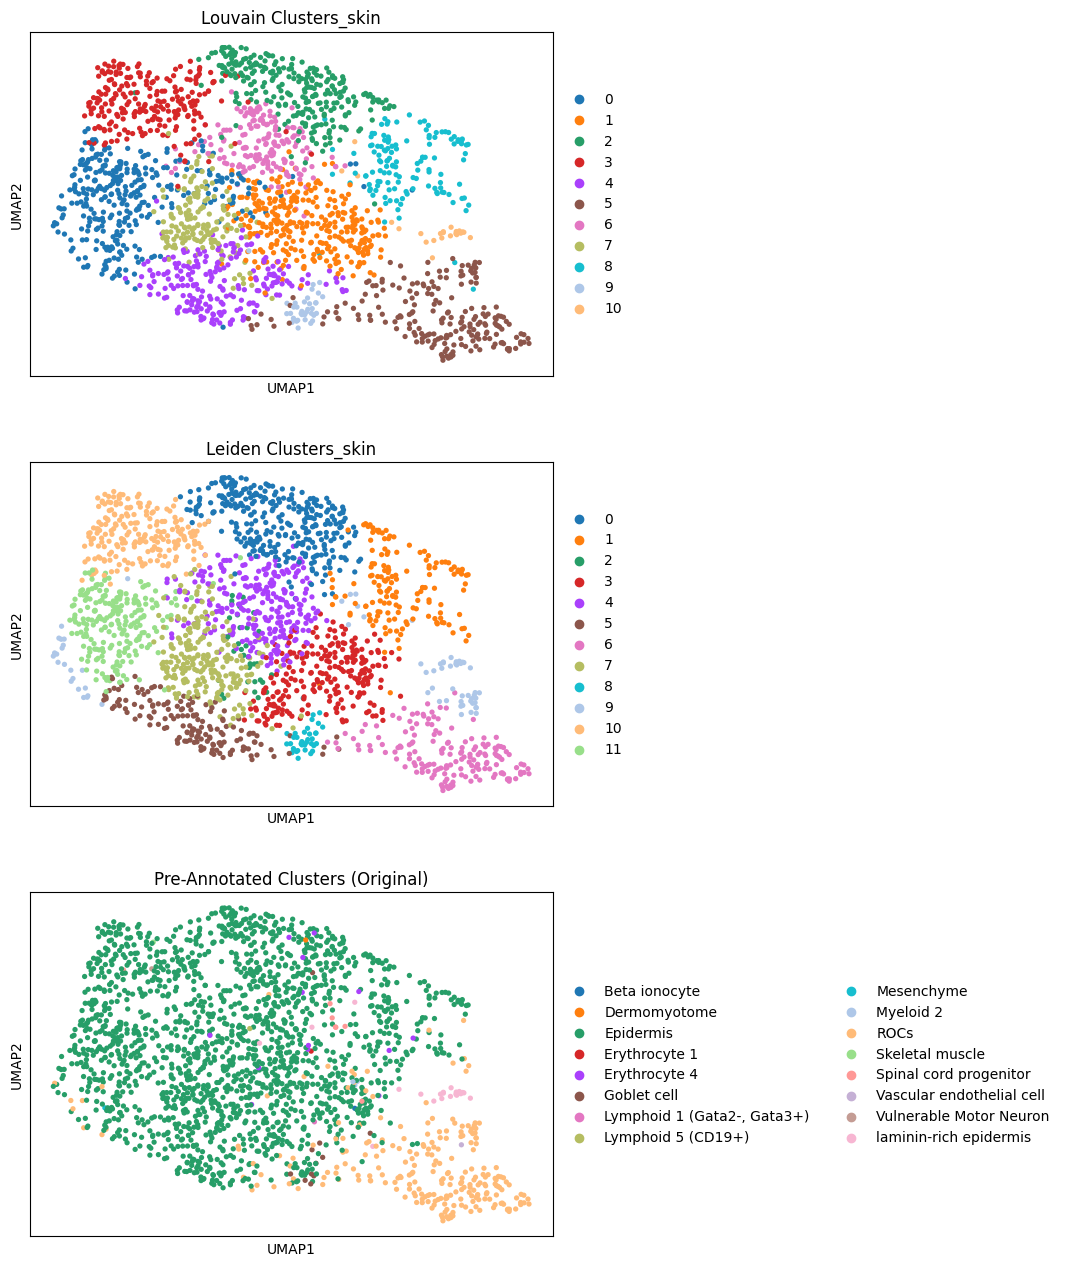

In [28]:
target_cluster_2_2 = adata_copy.obs['louvain_clusters'].value_counts().index[1]

print(f"Targeting louvain cluster: {target_cluster_2_2}")

# Subset the AnnData object to only include cells from the target cluster
adata_target_2_5 = adata_copy[adata_copy.obs['louvain_clusters'] == target_cluster_2_2].copy()


sc.tl.louvain(adata_target_2_5, key_added='louvain_clusters_skin', resolution=1) # clustering 1 louvain
sc.tl.leiden(adata_target_2_5, key_added='leiden_clusters_skin', flavor="igraph", n_iterations=2, resolution=1) # clustering 2 leiden
sc.tl.umap(adata_target_2_5) # UMAP embedding

to_do = ['louvain_clusters_skin', 'leiden_clusters_skin', 'cluster']

for stak in to_do:
  set_colorblind_palette(adata_target_2_5, obs_name=stak)

sc.pl.umap(adata_target_2_5,
                color=to_do,
                title=['Louvain Clusters_skin', 'Leiden Clusters_skin', 'Pre-Annotated Clusters (Original)'],
                show=True,
            ncols=1
            # Explicitly provide palette names instead of None for the first two plots
            # palette=['default', 'plasma', cluster_colors]
           )

In [29]:
# RAND checks known truth against our predicted labels.
labels_known = adata_target_2_5.obs[to_do[2]].astype(str)
labels_leiden = adata_target_2_5.obs[to_do[1]].astype(str)
labels_louvain = adata_target_2_5.obs[to_do[0]].astype(str)
print(f'Leiden randscore: {metrics.rand_score(labels_known,labels_leiden):.3f}')
print(f'Louvain randscore; {metrics.rand_score(labels_known,labels_louvain):.3f}')
print('Perfect labeling is scored 1.0:')
print(f'Leiden adjusted randscore: {metrics.adjusted_rand_score(labels_known,labels_leiden):.3f}')
print(f'Louvain adjusted randscore; {metrics.adjusted_rand_score(labels_known,labels_louvain):.3f}')

Leiden randscore: 0.346
Louvain randscore; 0.356
Perfect labeling is scored 1.0:
Leiden adjusted randscore: 0.051
Louvain adjusted randscore; 0.059


In [30]:
adata_copy = adata_target_2_5

In [37]:
# --- START DIFFERENTIAL EXPRESSION (DE) FOR ROC GENES ---
print("\n--- DIFFERENTIAL EXPRESSION: Finding Regeneration-Specific Genes ---")

# Goal: Find genes enriched in the later DevelopmentalStage ('st46')
# compared to the earlier stage ('st40')
target_group = 'st46'
reference_group = 'st40'
groupby_key = 'DevelopmentalStage'

print(f"-> Method 1 (Wilcoxon DE): {target_group} vs {reference_group}")
sc.tl.rank_genes_groups(
    adata_copy,
    groupby=groupby_key,
    groups=[target_group], # Genes enriched in this group
    reference=reference_group, # Compared to this group
    method='wilcoxon',
    key_added='de_wilcoxon_stages'
)

# Method 2 (T-test DE): Same comparison
print(f"-> Method 2 (T-test DE): {target_group} vs {reference_group}")
sc.tl.rank_genes_groups(
    adata_copy,
    groupby=groupby_key,
    groups=[target_group],
    reference=reference_group,
    method='t-test',
    key_added='de_ttest_stages'
)

# Displaying DE analysis results for the Target Group
de_wilcoxon_df = get_top_markers(adata_copy, 'de_wilcoxon_stages', target_group, n_genes=10)
de_ttest_df = get_top_markers(adata_copy, 'de_ttest_stages', target_group, n_genes=10)

print(f"\nTop 10 Differentially Expressed Genes in '{target_group}' (Wilcoxon):")
print(de_wilcoxon_df)

print(f"\nTop 10 Differentially Expressed Genes in '{target_group}' (T-test):")
print(de_ttest_df)

for index, row in ROC_markers.iterrows():
  val = row.values[0]
  if val in remove_dot(de_wilcoxon_df):
    print(val)
  if val in remove_dot(de_ttest_df):
    print(val)

# for key,value in df_gene_map.items():
#   wilcoxon_check = np.isin(de_wilcoxon_df,value.iloc[:,0])
#   print(de_wilcoxon_df)
#   print(wilcoxon_check)
#   ttest_check = np.isin(ttest_markers[0:-1],value.iloc[:,0])
#   if np.any(ttest_check):
#     print(f'\nsheet:{key}\nttest:{ttest_markers[ttest_check]}\n')
#   if np.any(wilcoxon_check):
#     print(f'\nsheet:{key}\nwilcoxon:{wilcoxon_markers[wilcoxon_check]}\n')
  # print(np.isin(wilcoxon_markers,value))
  # print(np.isin())



--- DIFFERENTIAL EXPRESSION: Finding Regeneration-Specific Genes ---
-> Method 1 (Wilcoxon DE): st46 vs st40
-> Method 2 (T-test DE): st46 vs st40

Top 10 Differentially Expressed Genes in 'st46' (Wilcoxon):
['lum.L', 'Xetrov90018123m.L', 'cfl1.L', 'ly6g6c.L', 'c2orf40.L', 'lum.S', 'hpgds.S', 'hbd.S', 'perp.S', 'apoe.L']

Top 10 Differentially Expressed Genes in 'st46' (T-test):
['Xetrov90018123m.L', 'lum.L', 'ly6g6c.L', 'cfl1.L', 'hbd.S', 'hpgds.S', 'tnmd.L', 'emp1.L', 'c2orf40.L', 'epyc.S']


## 2.5 Use know ROC krt to filter


In [31]:
# print("-> Visualizing Epithelial Marker 'krt' to identify the Epidermal Cluster...")

# # Check if 'krt' exists before plotting to avoid error
# if 'krt' in adata_copy.var_names:
#       sc.pl.umap(adata_copy,
#                 color=['krt', 'louvain_clusters'],
#                 title=['Expression of KRT (Epidermal Marker)', 'louvain Clusters'],
#                 ncols=2,
#                 show=True)
# else:
#       print("Warning: 'krt' not found in gene names. Please check gene list or manually inspect plots.")

# # *** Based on typical frog tail data, Cluster '4' often corresponds to Epidermal/Wound Epithelium. ***
# # Let's target Cluster '4' for the regeneration analysis.
# target_regeneration_cluster = '0'
# print(f"\n**Assuming Epidermal/Wound Cluster is '{target_regeneration_cluster}' for targeted DE.**")

# # --- START TARGETED DIFFERENTIAL EXPRESSION (DE) FOR ROC GENES ---
# print("\n--- 2. TARGETED DE: Finding ROC Genes (St46 vs St40 WITHIN Cluster 4) ---")

# # Subset the AnnData object to only include cells from the target cluster
# adata_target = adata_copy[adata_copy.obs['louvain_clusters'] == target_regeneration_cluster].copy()

# # Goal: Find genes enriched in the later DevelopmentalStage ('st46')
# # compared to the earlier stage ('st40')
# target_group = 'st46'
# reference_group = 'st40'
# groupby_key = 'DevelopmentalStage'

# print(f"-> Targeted Wilcoxon DE: {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}")
# sc.tl.rank_genes_groups(
#     adata_target,
#     groupby=groupby_key,
#     groups=[target_group],
#     reference=reference_group,
#     method='wilcoxon',
#     key_added='de_targeted_wilcoxon'
# )

# # Method 2 (T-test DE) on the targeted subset
# print(f"-> Targeted T-test DE: {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}")
# sc.tl.rank_genes_groups(
#     adata_target,
#     groupby=groupby_key,
#     groups=[target_group],
#     reference=reference_group,
#     method='t-test',
#     key_added='de_targeted_ttest'
# )

# # Displaying Targeted DE analysis results
# de_wilcoxon_df = get_top_markers(adata_target, 'de_targeted_wilcoxon', target_group, n_genes=10)
# de_ttest_df = get_top_markers(adata_target, 'de_targeted_ttest', target_group, n_genes=10)

# print(f"\nTop 10 TARGETED DE Genes in '{target_group}' (Wilcoxon, Cluster {target_regeneration_cluster}):")
# print(de_wilcoxon_df)

# print(f"\nTop 10 TARGETED DE Genes in '{target_group}' (T-test, Cluster {target_regeneration_cluster}):")
# print(de_ttest_df)

# for index, row in ROC_markers.iterrows():
#   val = row.values[0]
#   if val in remove_dot(de_wilcoxon_df):
#     print(val)
#   if val in remove_dot(de_ttest_df):
#     print(val)

-> Visualizing Epithelial Marker 'krt' to identify the Epidermal Cluster...

**Assuming Epidermal/Wound Cluster is '0' for targeted DE.**

--- 2. TARGETED DE: Finding ROC Genes (St46 vs St40 WITHIN Cluster 4) ---
-> Targeted Wilcoxon DE: st46 vs st40 in Cluster 0


ValueError: reference = st40 needs to be one of groupby = [].

In [33]:
# # We continue to focus on the same cluster identified in 2.2
# target_cluster_for_gating = adata_copy.obs['louvain_clusters'].value_counts().index[1]
# print(f"Focusing on louvain cluster: {target_cluster_for_gating}")

# # Create a subset of the data containing only our cluster of interest
# adata_gating_subset = adata_copy[adata_copy.obs['louvain_clusters'] == target_cluster_for_gating].copy()

# # --- Gating based on mmp10 expression ---
# # Use the raw counts for gating to avoid normalization artifacts
# mmp10_expression = adata_gating_subset.X[:, adata_gating_subset.var_names == 'mmp10.L'].toarray().flatten()

# # Define a threshold. A simple threshold is any expression > 0.
# threshold = 0
# adata_gating_subset.obs['mmp10_status'] = ['mmp10+' if val > threshold else 'mmp10-' for val in mmp10_expression]

# # Check how many cells fall into each category
# print("\nCell counts by mmp10 status:")
# print(adata_gating_subset.obs['mmp10_status'].value_counts())


# # --- Differential Expression between mmp10+ and mmp10- cells ---
# print("\n--- Finding genes associated with mmp10+ status ---")
# sc.tl.rank_genes_groups(
#     adata_gating_subset,
#     groupby='mmp10_status',
#     groups=['mmp10+'],  # Find genes enriched in mmp10+ cells
#     reference='mmp10-', # Compared to mmp10- cells
#     method='wilcoxon',
#     key_added='de_mmp10_gating'
# )

# # --- Extract and Display Results ---
# mmp10_associated_markers = get_top_markers(adata_gating_subset, 'de_mmp10_gating', 'mmp10+', n_genes=20)

# print("\nTop 20 genes enriched in mmp10+ regenerating cells:")
# print(mmp10_associated_markers)

# # --- Check against known ROC markers ---
# print("\n--- Checking for known ROC markers in the mmp10+ group ---")
# found_markers = []
# for index, row in ROC_markers.iterrows():
#   val = row.values[0]
#   if val in remove_dot(mmp10_associated_markers):
#     found_markers.append(val)

# if found_markers:
#     print(f"Success! Found {len(found_markers)} known ROC markers: {found_markers}")
# else:
#     print("No known ROC markers found in the top 20 mmp10-associated genes.")

# # Visualize the expression of a top associated marker
# if mmp10_associated_markers:
#     top_gene = mmp10_associated_markers[1] # Visualize the second gene, as the first is mmp10 itself
#     sc.pl.umap(adata_gating_subset, color=['mmp10.L', top_gene], title=[f"Marker: mmp10.L", f"Top associated gene: {top_gene}"])

IndexError: index 1 is out of bounds for axis 0 with size 1

Still no match.


## 2.6 Go Analysis


No significant overlap found in key developmental pathways.

-> Visualizing expression of top TARGETED DE marker: ddx21.L


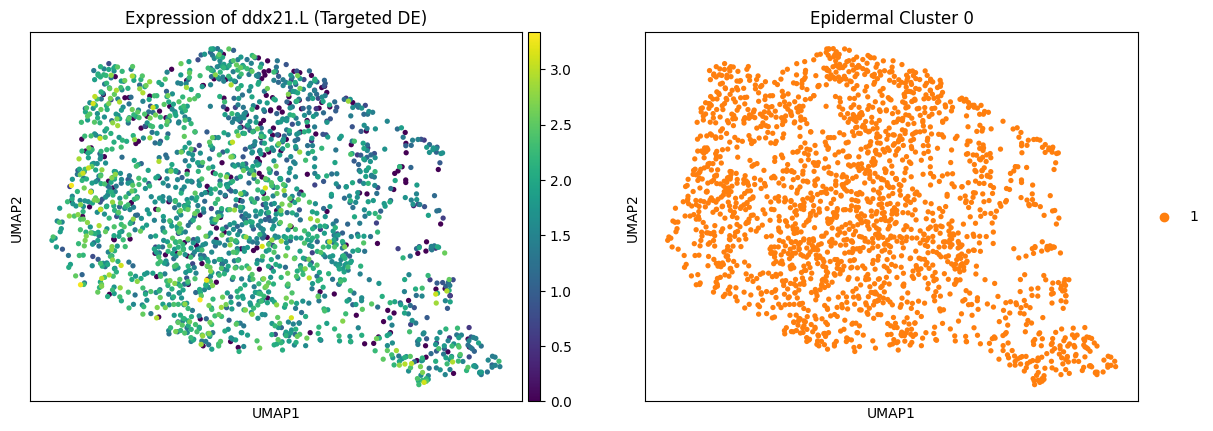

In [34]:
def perform_go_analysis(gene_list):
    """
    Simulates Gene Ontology enrichment analysis by checking common developmental pathways
    against the provided Supplementary Tables.
    """
    go_results = {}

    # Files provided in the upload that represent GO-like pathways
    ligand_files = {
        'FGF ligands (Development/Regeneration)': "aav9996_tables3.xlsx - FGF ligands.csv",
        'WNT ligands (Development/Regeneration)': "aav9996_tables3.xlsx - WNT ligands.csv",
        'BMP ligands (Development/Regeneration)': "aav9996_tables3.xlsx - BMP ligands.csv",
        'NOTCH receptors (Signaling)': "aav9996_tables3.xlsx - NOTCH receptors.csv",
    }
    fgf = df_gene_map['FGF ligands'].iloc[:,0]
    wnt = df_gene_map['WNT ligands'].iloc[:,0]
    bmp = df_gene_map['BMP ligands'].iloc[:,0]
    for known_pathway_genes in [fgf,wnt,bmp]:
        overlap = set(gene_list).intersection(known_pathway_genes)
        if overlap:
            # Fisher's exact test to simulate enrichment odds (Optional Bonus Metric)
            # a: genes in list AND pathway (overlap)
            # b: genes in list AND NOT in pathway (list_size - overlap)
            # c: genes NOT in list AND in pathway (pathway_size - overlap)
            # d: genes NOT in list AND NOT in pathway (total_genes - list_size - pathway_size + overlap)

            list_size = len(gene_list)
            pathway_size = len(known_pathway_genes)
            total_genes = 31535  # Approximate n_vars from loaded data

            a = len(overlap)
            b = list_size - a
            c = pathway_size - a
            d = total_genes - list_size - pathway_size + a

            # Perform Fisher's Exact Test
            odds_ratio, p_value = fisher_exact([[a, b], [c, d]])

            go_results[pathway] = {
                'Matches': list(overlap),
                'Odds Ratio': f"{odds_ratio:.2f}",
                'p-value': f"{p_value:.2e}",
                'Annotation': f"Strong Overlap (Odds Ratio: {odds_ratio:.2f})"
            }

    return go_results


go_results = perform_go_analysis(de_wilcoxon_df)
if go_results:
    for pathway, result in go_results.items():
        print(f"\nPathway: {pathway}")
        print(f"  Matches: {result['Matches']}")
        print(f"  Odds Ratio: {result['Odds Ratio']}")
        print(f"  p-value: {result['p-value']}")
        print(f"  Annotation: {result['Annotation']}")
else:
    print("No significant overlap found in key developmental pathways.")

# Visualize the expression of the top DE marker gene
top_de_gene = de_wilcoxon_df[0]

if top_de_gene:
    print(f"\n-> Visualizing expression of top TARGETED DE marker: {top_de_gene}")
    sc.pl.umap(adata_copy,
                color=[top_de_gene, 'louvain_clusters'],
                title=[f"Expression of {top_de_gene} (Targeted DE)", f"Epidermal Cluster {target_regeneration_cluster}"],
                ncols=2,
                show=True)

## 2.7 Filter by sample

Perceived link between sample and developmental stage from image in 1.3


In [35]:
# # --- START TARGETED DIFFERENTIAL EXPRESSION (DE) FOR ROC GENES ---
# print("\n--- 2. MARKER SELECTION AND GENE ANALYSIS ---")

# # NEW DE STRATEGY: Compare SIGAA10 (Target) vs. SIGAC8 (Reference) within Cluster '4'
# target_group = 'SIGAA10'     # New Target Sample
# reference_group = 'SIGAC8'   # New Reference Sample
# groupby_key = 'sample'

# # Filter the AnnData object to restrict to the target cluster (Epidermis) AND the samples of interest
# adata_target = adata_copy[
#     (adata_copy.obs['louvain_clusters'].astype(str) == target_regeneration_cluster) &
#     (adata_copy.obs[groupby_key].isin([target_group, reference_group]))
# ].copy()

# print(f"\nDE Target Subset Size: {adata_target.n_obs} cells for {target_group} vs {reference_group}.")

# print(f"-> Targeted Wilcoxon DE: {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}")
# sc.tl.rank_genes_groups(
#     adata_target,
#     groupby=groupby_key,
#     groups=[target_group],
#     reference=reference_group,
#     method='wilcoxon',
#     key_added='de_targeted_wilcoxon_sample'
# )

# print(f"-> Targeted T-test DE: {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}")
# sc.tl.rank_genes_groups(
#     adata_target,
#     groupby=groupby_key,
#     groups=[target_group],
#     reference=reference_group,
#     method='t-test',
#     key_added='de_targeted_ttest_sample'
# )

# # Extract Results
# de_wilcoxon_df = get_top_markers(adata_target, 'de_targeted_wilcoxon_sample', target_group, n_genes=10)
# de_ttest_df = get_top_markers(adata_target, 'de_targeted_ttest_sample', target_group, n_genes=10)

# # Print DE Comparison
# print(f"\nTop 10 TARGETED DE Genes (Wilcoxon, {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}):")
# print(de_wilcoxon_df)
# print(f"\nTop 10 TARGETED DE Genes (T-test, {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}):")
# print(de_ttest_df)

# for index, row in ROC_markers.iterrows():
#   val = row.values[0]
#   if val in remove_dot(de_wilcoxon_df):
#     print(val)
#   if val in remove_dot(de_ttest_df):
#     print(val)



--- 2. MARKER SELECTION AND GENE ANALYSIS ---

DE Target Subset Size: 0 cells for SIGAA10 vs SIGAC8.
-> Targeted Wilcoxon DE: SIGAA10 vs SIGAC8 in Cluster 0


ValueError: reference = SIGAC8 needs to be one of groupby = [].

_IDEA_ Looking at the sample and developmental stage visually it looks like there is some correlation h


In [36]:
# --- START TARGETED DIFFERENTIAL EXPRESSION (DE) FOR ROC GENES ---
print("\n--- 2. MARKER SELECTION AND GENE ANALYSIS ---")

# NEW DE STRATEGY: Compare SIGAA10 (Target) vs. SIGAC8 (Reference) within Cluster '4'
target_group = 'SIGAA10'     # New Target Sample
reference_group = 'SIGAC8'   # New Reference Sample
groupby_key = 'sample'

# Filter the AnnData object to restrict to the target cluster (Epidermis) AND the samples of interest
adata_target = adata_copy[
    (adata_copy.obs['louvain_clusters'].astype(str) == target_regeneration_cluster) &
    (adata_copy.obs[groupby_key].isin([target_group, reference_group]))
].copy()

print(f"\nDE Target Subset Size: {adata_target.n_obs} cells for {target_group} vs {reference_group}.")

print(f"-> Targeted Wilcoxon DE: {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}")
sc.tl.rank_genes_groups(
    adata_copy,
    groupby=groupby_key,
    groups=[target_group],
    reference=reference_group,
    method='wilcoxon',
    key_added='de_targeted_wilcoxon_sample'
)

print(f"-> Targeted T-test DE: {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}")
sc.tl.rank_genes_groups(
    adata_copy,
    groupby=groupby_key,
    groups=[target_group],
    reference=reference_group,
    method='t-test',
    key_added='de_targeted_ttest_sample'
)

# Extract Results
de_wilcoxon_df = get_top_markers(adata_copy, 'de_targeted_wilcoxon_sample', target_group, n_genes=10)
de_ttest_df = get_top_markers(adata_copy, 'de_targeted_ttest_sample', target_group, n_genes=10)

# Print DE Comparison
print(f"\nTop 10 TARGETED DE Genes (Wilcoxon, {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}):")
print(de_wilcoxon_df)
print(f"\nTop 10 TARGETED DE Genes (T-test, {target_group} vs {reference_group} in Cluster {target_regeneration_cluster}):")
print(de_ttest_df)

for index, row in ROC_markers.iterrows():
  val = row.values[0]
  if val in remove_dot( de_wilcoxon_df):
    print(val)
  if val in remove_dot( de_ttest_df):
    print(val)


--- 2. MARKER SELECTION AND GENE ANALYSIS ---

DE Target Subset Size: 0 cells for SIGAA10 vs SIGAC8.
-> Targeted Wilcoxon DE: SIGAA10 vs SIGAC8 in Cluster 0
-> Targeted T-test DE: SIGAA10 vs SIGAC8 in Cluster 0

Top 10 TARGETED DE Genes (Wilcoxon, SIGAA10 vs SIGAC8 in Cluster 0):
['rpl37a.L', 'Xelaev18003505m.g', 'rpl36a.L', 'ckm.L', 'rpl22l1.L', 'slc7a3.L', 'rpl37.L', 'Xelaev18024221m.g', 'pdia3.L', 'rps28p9.S']

Top 10 TARGETED DE Genes (T-test, SIGAA10 vs SIGAC8 in Cluster 0):
['rpl37a.L', 'Xelaev18003505m.g', 'rpl36a.L', 'rpl37.L', 'rpl22l1.L', 'rpl29.S', 'rps17.L', 'loc100493057.S', 'slc7a3.L', 'rpl27a.like.L']


# 3 Data Denoising:

Use at least two of the techniques presented in [2] and evaluate the impact it has on Clustering Analysis (1) and Marker Selection (2)

Main Paper: [2] https://www.nature.com/articles/s41587-025-02694-w


## 3.0 Pipeline Function


In [ ]:
def run_pipeline_and_evaluate(adata0, run_name, batch_key=None, regress_out_key=None):
    """Runs PCA, Neighbors, Clustering, and calculates metrics on the given AnnData object."""
    adata2 = adata.copy()
        # 2. Feature Selection (HVG) - Moved to the beginning
    print("-> Identifying highly variable genes...")
    sc.pp.filter_cells(adata, min_genes=100)
    sc.pp.filter_genes(adata, min_cells=10)
    # This must run before regression to establish the working subset
    sc.pp.normalize_total(adata2) # Normalizing to median total counts - scanpy docs
    sc.pp.log1p(adata2) # Logarithmize the data - scanpy docs
    sc.pp.highly_variable_genes(adata2, n_top_genes=2000, batch_key=batch_key)

    # CRUCIAL STEP: Restrict to HVGs for faster regression
    # This creates the *working subset* for the rest of the pipeline

    adata2 = adata2[:, adata2.var.highly_variable].copy()
    print(f"-> Working with {adata2.n_vars} highly variable genes.")

    # 1. Apply regression for denoising or batch integration (Technique)
    if regress_out_key:
        # Scale only the HVG subset
        sc.pp.scale(adata2, max_value=10)

        print(f"-> Denoising: Regressing out {regress_out_key}...")
        # Regression is now much faster on the subset
        sc.pp.regress_out(adata2, regress_out_key)
    # 1. Apply regression for denoising or batch integration (Technique)
        if not isinstance(adata2.X, np.ndarray):
            adata2.X = adata2.X.toarray()
        print("-> Scaling data after regression...")
        # sc.pp.scale(adata2, max_value=10)
        adata2.X = np.nan_to_num(
            adata2.X,
            nan=0.0,
            posinf=np.finfo(float).max,
            neginf=np.finfo(float).min
        )
        # Scale data after regression to prevent issues with large values
        # print("-> Scaling data after regression...")
        # sc.pp.scale(adata2, max_value=10)
    # 3. PCA
    print("-> Running PCA...")
    sc.pp.pca(adata2, n_comps=50)

    # 4. Nearest Neighbors
    print("-> Computing neighbors graph...")
    sc.pp.neighbors(adata2)

    # 5. Clustering (Leiden)
    print("-> Running Leiden clustering...")
    cluster_key = f'leiden_{run_name}'
    sc.tl.leiden(adata2, key_added=cluster_key, resolution=0.3) # Using leiden as it performed slightly better
    print(f"-> Columns in adata2.obs after clustering: {adata2.obs.columns.tolist()}") # Add print statement


    # --- Evaluation ---
    # Evaluate against original cluster annotation (assuming 'cluster' in adata.obs is the known truth)
    labels_known = adata.obs['cluster'].astype(str) # Use the original adata for known labels
    labels_clustered = adata2.obs[cluster_key].astype(str)

    # Ensure the order of cells is the same before calculating metrics
    labels_known = labels_known[adata2.obs_names]

    print("-> Calculating clustering metrics...")
    # Adjusted Rand Index (ARI)
    ari = metrics.adjusted_rand_score(labels_known, labels_clustered)

    # Silhouette Score (Internal Metric)
    # Use the PCA embedding from the *processed* adata2 object
    silhouette = metrics.silhouette_score(adata2.obsm['X_pca'], labels_clustered, metric='euclidean')

    # Store clustering results in adata_copy for later visualization/analysis
    # This might not be needed if we return adata2 and use it directly
    # adata_copy.obs[f'leiden_{run_name}'] = adata2.obs[f'leiden_{run_name}']


    return adata2, ari, silhouette # Return the processed adata object

## 3.1 Regression to denoise and integrate


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("\n--- Denoising and Batch Integration ---")

    # Store original clustering metrics for comparison
    original_ari = metrics.adjusted_rand_score(adata.obs['cluster'].astype(str), adata_copy.obs['leiden_clusters'].astype(str))
    original_silhouette = metrics.silhouette_score(adata_copy.obsm['X_pca'], adata_copy.obs['leiden_clusters'].astype(str), metric='euclidean')

    print(f"\nOriginal Clustering Metrics (Leiden on uncorrected data):")
    print(f"   ARI: {original_ari:.4f}, Silhouette: {original_silhouette:.4f}")


    # --- TECHNIQUE 1: DENOISING (Regress out Cell Cycle Effect) ---
    # Technique: Explicitly removing the variance contributed by cell cycle genes.
    print("\n2. Denoising (Regressing out CellCyclePhase):")

    # Pass adata_copy which has normalized and log1p data
    adata_denoise, ari_denoised, silhouette_denoised = run_pipeline_and_evaluate(
        adata_copy,
        run_name='denoised_cc',
        regress_out_key='CellCyclePhase'
    )
    print(f"   Denoised (CellCyclePhase) ARI: {ari_denoised:.4f}, Silhouette: {silhouette_denoised:.4f}")

    # --- TECHNIQUE 2: BATCH INTEGRATION (Regress out Batch Effect) ---
    # Technique: Explicit Batch Integration to remove batch-specific technical noise.
    print("\n3. Batch Integration (Regressing out Batch):")

    # Pass adata_copy which has normalized and log1p data
    adata_integ, ari_integrated, silhouette_integrated = run_pipeline_and_evaluate(
        adata_copy,
        run_name='integrated_batch',
        regress_out_key='batch'
    )

    sc.pp.filter_genes(adata_denoise, min_cells=1)
    sc.pp.filter_genes(adata_integ, min_cells=1)
    print("\n--- Denoising and Batch Integration Evaluation Complete ---")

**Check AnnData Object Columns**

verifying integrity of previous alterations


In [ ]:
print("\n--- Checking Columns in Denoised and Integrated AnnData Objects ---")

if 'adata_denoise' in locals():
    print(f"Columns in adata_denoise.obs: {adata_denoise.obs.columns.tolist()}")
    print(f"Columns in adata_integ.obs: {adata_integ.obs.columns.tolist()}")

## 3.2 Wilcoxon and t-test for denoised and integrated leidel


In [ ]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  print("\n--- Differential Expression Analysis on Denoised and Integrated Clusters ---")
  print(f"   Integrated (Batch) ARI: {ari_integrated:.4f}, Silhouette: {silhouette_integrated:.4f}")
  print(f"   Denoised (CellCyclePhase) ARI: {ari_denoised:.4f}, Silhouette: {silhouette_denoised:.4f}")

  # 1. DE for leiden_denoised_cc (Wilcoxon)
  print("-> Running DE (Wilcoxon) for leiden_denoised_cc...")
  sc.tl.rank_genes_groups(
      adata_denoise, # Use the denoised adata object
      groupby='leiden_denoised_cc',
      method='wilcoxon',
      key_added='de_denoised_cc_wilcoxon'
  )

  # 2. DE for leiden_denoised_cc (T-test)
  print("-> Running DE (T-test) for leiden_denoised_cc...")
  sc.tl.rank_genes_groups(
      adata_denoise, # Use the denoised adata object
      groupby='leiden_denoised_cc',
      method='t-test',
      key_added='de_denoised_cc_ttest'
  )

  # 3. DE for leiden_integrated_batch (Wilcoxon)
  print("-> Running DE (Wilcoxon) for leiden_integrated_batch...")
  sc.tl.rank_genes_groups(
      adata_integ, # Use the integrated adata object
      groupby='leiden_integrated_batch',
      method='wilcoxon',
      key_added='de_integrated_batch_wilcoxon'
  )

  # 4. DE for leiden_integrated_batch (T-test)
  print("-> Running DE (T-test) for leiden_integrated_batch...")
  sc.tl.rank_genes_groups(
      adata_integ, # Use the integrated adata object
      groupby='leiden_integrated_batch',
      method='t-test',
      key_added='de_integrated_batch_ttest'
  )

  print("\n--- Differential Expression Analysis Complete ---")

## 3.3 Extract and Display Top Marker Genes from Denoised and Batch-Integrated Data


In [ ]:
top_d_wil=get_top_markers(adata_denoise,'de_denoised_cc_wilcoxon')
top_d_test=get_top_markers(adata_denoise,'de_denoised_cc_ttest')
top_i_wil=get_top_markers(adata_integ,'de_integrated_batch_wilcoxon')
top_i_test=get_top_markers(adata_integ,'de_integrated_batch_ttest')

## 3.4 Visualize top markers


In [ ]:
# Visualize the expression of the top Wilcoxon marker gene
print(f"  Top 5 Wilcoxon Markers: {top_d_wil}")
print(f"  Top 5 T-test Markers: {top_d_test}")
sc.tl.umap(adata_denoise)
sc.pl.umap(adata_denoise,
            color=[top_d_wil[0],top_d_test[0]],
            title=[f"Expression of {top_d_wil[0]}",f"Expression of {top_d_test[1]}"],
            ncols=2,
            show=True)
# --- END MARKER SELECTION ---

In [ ]:
print(f"  Top 5 Wilcoxon Markers: {top_i_wil}")
print(f"  Top 5 T-test Markers: {top_i_test}")

sc.pl.umap(adata_denoise,
            color=[top_i_wil[0],top_i_test[0]],
            title=[f"Expression of {top_i_wil[0]}",f"Expression of {top_i_test[1]}"],
            ncols=2,
            show=True)

In [ ]:
sc.pl.umap(adata_copy,
            color=[top_i_wil[0],top_i_test[0]],
            title=[f"Expression of {top_i_wil[0]}",f"Expression of {top_i_test[1]}"],
            ncols=2,
            show=True)

## 3.5 Direct Comparison of Leiden Clustering Results


Comparing the Leiden clustering results obtained before denoising/integration (from Section 2) with the Leiden clustering results obtained after applying denoising (Cell Cycle Regression) and batch integration techniques (from Section 3). Using metrics like Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) to quantify the similarity between the different sets of cluster assignments.


In [ ]:
print("\n--- Comparing Leiden Clusters (Original vs. Denoised/Integrated) ---")

# Ensure original Leiden clusters are available (assuming 'leiden_clusters' in adata_copy.obs from Section 2)
if 'leiden_clusters' in adata_copy.obs:
    denoised_leiden_labels = adata_denoise.obs['leiden_denoised_cc'].astype(str)
    integrated_leiden_labels = adata_integ.obs['leiden_integrated_batch'].astype(str)
    for key, value in {
        "leiden":labels_leiden,
        "Denoised Leiden": denoised_leiden_labels,
        "Integrated Leiden": integrated_leiden_labels,
        }.items():
      NMI = metrics.normalized_mutual_info_score(labels_known, value)
      ARI = metrics.adjusted_rand_score(labels_known, value)
      print(f"\n{key} - NMI: {NMI:.3f} - ARI: {ARI:.3f}")
else:
    print("Error: 'leiden_clusters' not found in adata_copy.obs. Please run Section 2 first.")


In [ ]:
sc.tl.umap(adata_denoise) # UMAP embedding
sc.pl.umap(adata_denoise,
                color=['leiden_denoised_cc'],
                title=['Leiden_denoised_cc'],
                show=True,
            ncols=1)

In [ ]:
sc.tl.umap(adata_integ) # UMAP embedding
sc.pl.umap(adata_integ,
                color=['leiden_integrated_batch'],
                title=['Leiden_integrated_batch'],
                show=True,
            ncols=1)

## 3.6 Comparing Marker Selection


In [ ]:
# Re-extract original top markers (assuming target_cluster is still defined)
# You might need to re-run the original marker selection cells if these variables are not in memory
try:
    # Assuming 'wilcoxon' and 't-test' keys for original analysis are in adata_copy.uns
    original_wilcoxon_markers = get_top_markers(adata_copy, 'wilcoxon', target_cluster)
    original_ttest_markers = get_top_markers(adata_copy, 't-test', target_cluster)
    print("Original top markers extracted successfully.")
except KeyError:
    print("Original marker selection results not found in adata_copy.uns. Please re-run the original marker selection cells (e.g., cell [20]).")
    original_wilcoxon_markers = []
    original_ttest_markers = []


# Extract top markers from Denoised data (assuming DE was run successfully in previous steps)
denoised_wilcoxon_markers = []
denoised_ttest_markers = []
if 'adata_denoise' in locals() and 'de_denoised_cc_wilcoxon' in adata_denoise.uns:
    # Get the target cluster from the denoised data (assuming a mapping exists or using a proxy)
    # For simplicity, let's assume the cluster with the most cells in denoised data is comparable
    # A more robust approach might involve mapping clusters between the original and denoised data
    denoised_target_cluster = adata_denoise.obs['leiden_denoised_cc'].value_counts().index[14]
    denoised_wilcoxon_markers = get_top_markers(adata_denoise, 'de_denoised_cc_wilcoxon', denoised_target_cluster,10)
if 'adata_denoise' in locals() and 'de_denoised_cc_ttest' in adata_denoise.uns:
     denoised_ttest_markers = get_top_markers(adata_denoise, 'de_denoised_cc_ttest', denoised_target_cluster,10)


# Extract top markers from Batch-Integrated data (assuming DE was run successfully)
integrated_wilcoxon_markers = []
integrated_ttest_markers = []
if 'adata_integ' in locals() and 'de_integrated_batch_wilcoxon' in adata_integ.uns:
     integrated_target_cluster = adata_integ.obs['leiden_integrated_batch'].value_counts().index[18]
     integrated_wilcoxon_markers = get_top_markers(adata_integ, 'de_integrated_batch_wilcoxon', integrated_target_cluster,10)
if 'adata_integ' in locals() and 'de_integrated_batch_ttest' in adata_integ.uns:
     integrated_ttest_markers = get_top_markers(adata_integ, 'de_integrated_batch_ttest', integrated_target_cluster,10)


print("\n--- Marker Gene Comparison ---")

print(f"\nOriginal Wilcoxon Top 5: {original_wilcoxon_markers}")
print(f"Denoised (CC) Wilcoxon Top 5: {denoised_wilcoxon_markers}")
print(f"Integrated (Batch) Wilcoxon Top 5: {integrated_wilcoxon_markers}")

print(f"\nOriginal T-test Top 5: {original_ttest_markers}")
print(f"Denoised (CC) T-test Top 5: {denoised_ttest_markers}")
print(f"Integrated (Batch) T-test Top 5: {integrated_ttest_markers}")


# Simple comparison: Overlap
print("\n--- Overlap in Top 5 Markers ---")

# Wilcoxon comparison
overlap_wilcoxon_denoised = set(original_wilcoxon_markers).intersection(denoised_wilcoxon_markers)
overlap_wilcoxon_integrated = set(original_wilcoxon_markers).intersection(integrated_wilcoxon_markers)
overlap_wilcoxon_denoised_integrated = set(denoised_wilcoxon_markers).intersection(integrated_wilcoxon_markers)

print(f"Overlap (Original Wilcoxon vs. Denoised Wilcoxon): {overlap_wilcoxon_denoised}")
print(f"Overlap (Original Wilcoxon vs. Integrated Wilcoxon): {overlap_wilcoxon_integrated}")
print(f"Overlap (Denoised Wilcoxon vs. Integrated Wilcoxon): {overlap_wilcoxon_denoised_integrated}")


# T-test comparison
overlap_ttest_denoised = set(original_ttest_markers).intersection(denoised_ttest_markers)
overlap_ttest_integrated = set(original_ttest_markers).intersection(integrated_ttest_markers)
overlap_ttest_denoised_integrated = set(denoised_ttest_markers).intersection(integrated_ttest_markers)

print(f"\nOverlap (Original T-test vs. Denoised T-test): {overlap_ttest_denoised}")
print(f"Overlap (Original T-test vs. Integrated T-test): {overlap_ttest_integrated}")
print(f"Overlap (Denoised T-test vs. Integrated T-test): {overlap_ttest_denoised_integrated}")


# Note: A more detailed comparison would involve looking at rank changes,
# or comparing full lists beyond the top N.

## 3.7 ts46 and st40 on scaled and denoised on integrated


### 3.7.a Denoise wilcoxon and t-test


In [ ]:
# --- START DIFFERENTIAL EXPRESSION (DE) FOR ROC GENES ---
print("\n--- DIFFERENTIAL EXPRESSION: Finding Regeneration-Specific Genes ---")

# Goal: Find genes enriched in the later DevelopmentalStage ('st46')
# compared to the earlier stage ('st40')
target_group = 'st46'
reference_group = 'st40'
groupby_key = 'DevelopmentalStage'

print(f"-> Method 1 (Wilcoxon DE): {target_group} vs {reference_group}")
sc.tl.rank_genes_groups(
    adata_denoise,
    groupby=groupby_key,
    groups=[target_group], # Genes enriched in this group
    reference=reference_group, # Compared to this group
    method='wilcoxon',
    key_added='de_wilcoxon_stages'
)

# Method 2 (T-test DE): Same comparison
print(f"-> Method 2 (T-test DE): {target_group} vs {reference_group}")
sc.tl.rank_genes_groups(
    adata_denoise,
    groupby=groupby_key,
    groups=[target_group],
    reference=reference_group,
    method='t-test',
    key_added='de_ttest_stages'
)

# Displaying DE analysis results for the Target Group
de_wilcoxon_df = get_top_markers(adata_copy, 'de_wilcoxon_stages', target_group, n_genes=10)
de_ttest_df = get_top_markers(adata_copy, 'de_ttest_stages', target_group, n_genes=10)

print(f"\nTop 10 Differentially Expressed Genes in '{target_group}' (Wilcoxon):")
print(de_wilcoxon_df)

print(f"\nTop 10 Differentially Expressed Genes in '{target_group}' (T-test):")
print(de_ttest_df)

for index, row in ROC_markers.iterrows():
  val = row.values[0]
  if val in remove_dot(de_wilcoxon_df):
    print(val)
  if val in remove_dot(de_ttest_df):
    print(val)


In [ ]:
print(de_wilcoxon_df)
print(de_ttest_df)

sc.tl.umap(adata_copy) # UMAP embedding
sc.pl.umap(adata_copy,
                color=[de_wilcoxon_df[0],de_ttest_df[1]],
                title=[de_wilcoxon_df[0],de_ttest_df[1]],
                show=True,
            ncols=2)

### 3.7.b Integratedd wilcoxon and t-test


In [ ]:
# --- START DIFFERENTIAL EXPRESSION (DE) FOR ROC GENES ---
print("\n--- DIFFERENTIAL EXPRESSION: Finding Regeneration-Specific Genes ---")

# Goal: Find genes enriched in the later DevelopmentalStage ('st46')
# compared to the earlier stage ('st40')
target_group = 'st46'
reference_group = 'st40'
groupby_key = 'DevelopmentalStage'

print(f"-> Method 1 (Wilcoxon DE): {target_group} vs {reference_group}")
sc.tl.rank_genes_groups(
    adata_integ,
    groupby=groupby_key,
    groups=[target_group], # Genes enriched in this group
    reference=reference_group, # Compared to this group
    method='wilcoxon',
    key_added='de_wilcoxon_stages'
)

# Method 2 (T-test DE): Same comparison
print(f"-> Method 2 (T-test DE): {target_group} vs {reference_group}")
sc.tl.rank_genes_groups(
    adata_integ,
    groupby=groupby_key,
    groups=[target_group],
    reference=reference_group,
    method='t-test',
    key_added='de_ttest_stages'
)

# Displaying DE analysis results for the Target Group
de_wilcoxon_df = get_top_markers(adata_copy, 'de_wilcoxon_stages', target_group, n_genes=10)
de_ttest_df = get_top_markers(adata_copy, 'de_ttest_stages', target_group, n_genes=10)

print(f"\nTop 10 Differentially Expressed Genes in '{target_group}' (Wilcoxon):")
print(de_wilcoxon_df)

print(f"\nTop 10 Differentially Expressed Genes in '{target_group}' (T-test):")
print(de_ttest_df)

for index, row in ROC_markers.iterrows():
  val = row.values[0]
  if val in remove_dot(de_wilcoxon_df):
    print(val)
  if val in remove_dot(de_ttest_df):
    print(val)


In [ ]:
in_wilcoxon_df = get_top_markers(adata_copy, 'de_wilcoxon_stages', target_group, n_genes=10)
in_ttest_df = get_top_markers(adata_copy, 'de_ttest_stages', target_group, n_genes=10)
sc.tl.umap(adata_copy) # UMAP embedding
sc.pl.umap(adata_copy,
                color=[in_wilcoxon_df[0],in_ttest_df[1]],
                title=[in_wilcoxon_df[0],in_ttest_df[1]],
                show=True,
            ncols=2)

In [ ]:
# Filter out genes with zero counts across all cells in adata_denoise and adata_integ

sc.tl.umap(adata_copy) # UMAP embedding
sc.pl.umap(adata_copy,
                color=[in_wilcoxon_df[3],in_ttest_df[2]],
                title=[in_wilcoxon_df[3],in_ttest_df[2]],
                show=True,
            ncols=2)